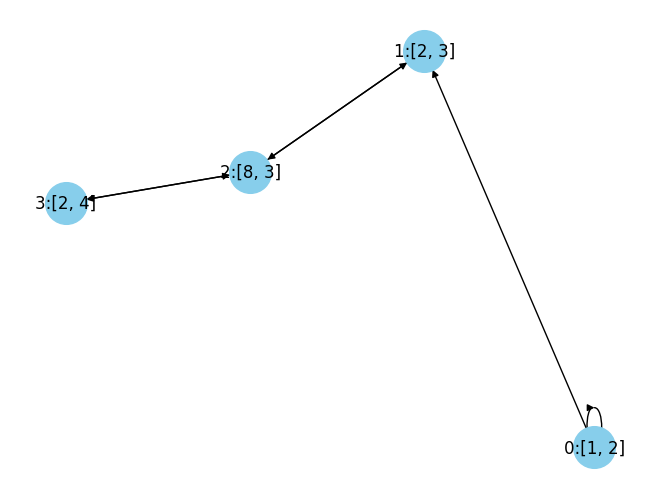

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

nodes=[0,1,2,3]
G.add_nodes_from(nodes)

node_attributes = {0:'[1, 2]',1:'[2, 3]', 2:'[8, 3]',3:'[2, 4]'}
nx.set_node_attributes(G,node_attributes,'embeddings')

edge_index=[(0,0),(0,1),(1,2),(2,1),(2,3),(3,2)]
G.add_edges_from(edge_index)

node_labels=nx.get_node_attributes(G,'embeddings')
pos=nx.spring_layout(G)

nx.draw(G,pos,with_labels=False,node_size=900,node_color='skyblue',font_size=15,font_color='black')

nx.draw_networkx_labels(G,pos,font_color="black",labels={k:f'{k}:{v}' for k,v in node_labels.items()})

plt.show()

In [4]:
import torch
from torch_geometric.nn import MessagePassing  

x=torch.tensor(
    [
        [1,2],
        [2,3],
        [8,3],
        [2,4]
    ]
)

edge_index=torch.tensor(
    [
        [0,0,1,2,2,3],
        [0,1,2,1,3,2]
    ]
)

class MessagePassingLayer(MessagePassing):
    def __init__(self):
        super(MessagePassingLayer,self).__init__(aggr='add')
    def forward(self,x,edge_index):
        return self.propagate(x=x,edge_index=edge_index)
    def message(self,x_i,x_j):
        print(x_i)
        print(x_j)
        return (x_j+x_i)

MessagePassingLayer = MessagePassingLayer()
output = MessagePassingLayer(x, edge_index)
print(output)

tensor([[1, 2],
        [2, 3],
        [8, 3],
        [2, 3],
        [2, 4],
        [8, 3]])
tensor([[1, 2],
        [1, 2],
        [2, 3],
        [8, 3],
        [8, 3],
        [2, 4]])
tensor([[ 2,  4],
        [13, 11],
        [20, 13],
        [10,  7]])
